**Mini Project 3**


## 1. Business Problem and Data Science Translation

### Business Problem
Create an AI-powered monitoring dashboard that tracks and analyzes the popularity and reception of video games released in 2025 across Steam, Twitch, and Reddit.

### Data Science Translation
- **Objective:** Continuously monitor and analyze video game performance using metrics such as sales estimates, user reviews, streaming activity, and social media sentiment.
- **Key Questions:**
    - Which new releases are trending or gaining popularity?
    - What are the main drivers of positive or negative reception?
    - How does social media buzz correlate with in-game metrics and sales?
    - Can we predict which games will become hits based on early reception and activity?
- **Approach:**
    - Aggregate and preprocess data from Steam (game stats, reviews), Twitch (viewership, streamer activity), and Reddit (mentions, sentiment).
    - Apply EDA and feature engineering to identify important variables and trends.
    - Use supervised learning (regression/classification) to predict game success.
    - Apply NLP for sentiment analysis and topic modeling on Reddit and review texts.
    - Build dashboards for real-time monitoring and reporting of key metrics and insights.

### Impact
This dashboard will provide actionable insights for game publishers, marketers, and analysts, enabling them to identify rising stars, optimize promotion strategies, and better understand the gaming community’s preferences in real time.

In [1]:
import requests
from bs4 import BeautifulSoup

def get_top_steam_games(n=20):
    url = "https://steamcharts.com/top"
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text, 'html.parser')
    table = soup.find("table", {"class": "common-table"})
    games = []
    for row in table.find_all("tr")[1:n+1]:
        cols = row.find_all("td")
        rank = int(cols[0].text.strip().replace('.', ''))
        name = cols[1].find("a").text.strip()
        steamcharts_url = cols[1].find("a")["href"]
        # Extract appid from URL like /app/730
        appid = int(steamcharts_url.split("/")[2])
        current_players = int(cols[2].text.strip().replace(',', ''))
        games.append({
            "rank": rank,
            "name": name,
            "appid": appid,
            "current_players": current_players
        })
    return games

if __name__ == "__main__":
    top_games = get_top_steam_games()
    for game in top_games:
        print(f"#{game['rank']}: {game['name']} (AppID: {game['appid']}) - Players: {game['current_players']}")

#1: Counter-Strike 2 (AppID: 730) - Players: 859291
#2: PUBG: BATTLEGROUNDS (AppID: 578080) - Players: 462296
#3: Dota 2 (AppID: 570) - Players: 413087
#4: Bongo Cat (AppID: 3419430) - Players: 149916
#5: Delta Force (AppID: 2507950) - Players: 147437
#6: Apex Legends (AppID: 1172470) - Players: 136512
#7: Banana (AppID: 2923300) - Players: 113138
#8: Stardew Valley (AppID: 413150) - Players: 106666
#9: Wallpaper Engine (AppID: 431960) - Players: 103669
#10: NARAKA: BLADEPOINT (AppID: 1203220) - Players: 99966
#11: Marvel Rivals (AppID: 2767030) - Players: 90335
#12: Rust (AppID: 252490) - Players: 81638
#13: RimWorld (AppID: 294100) - Players: 68990
#14: Tom Clancy's Rainbow Six® Siege X (AppID: 359550) - Players: 65449
#15: Grand Theft Auto V Legacy (AppID: 271590) - Players: 58813
#16: Destiny 2 (AppID: 1085660) - Players: 58526
#17: Palworld (AppID: 1623730) - Players: 54816
#18: Dead by Daylight (AppID: 381210) - Players: 53207
#19: Warframe (AppID: 230410) - Players: 52628
#20: V

In [2]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [3]:
from dotenv import load_dotenv
import os

load_dotenv(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Mini Project 3\twitch_api.env')

TWITCH_CLIENT_ID = os.getenv("TWITCH_CLIENT_ID")
TWITCH_CLIENT_SECRET = os.getenv("TWITCH_CLIENT_SECRET")

In [4]:
import os
import requests
import time
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

TWITCH_CLIENT_ID = os.getenv("TWITCH_CLIENT_ID")
TWITCH_CLIENT_SECRET = os.getenv("TWITCH_CLIENT_SECRET")

def get_twitch_oauth_token(client_id, client_secret):
    url = "https://id.twitch.tv/oauth2/token"
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "grant_type": "client_credentials"
    }
    r = requests.post(url, params=params)
    r.raise_for_status()
    return r.json()["access_token"]

def get_twitch_game_id(game_name, oauth_token, client_id):
    url = "https://api.twitch.tv/helix/games"
    headers = {
        "Client-ID": client_id,
        "Authorization": f"Bearer {oauth_token}"
    }
    params = {"name": game_name}
    r = requests.get(url, headers=headers, params=params)
    r.raise_for_status()
    data = r.json()["data"]
    if data:
        return data[0]["id"]
    else:
        return None

def get_live_stream_count(game_id, oauth_token, client_id):
    url = "https://api.twitch.tv/helix/streams"
    headers = {
        "Client-ID": client_id,
        "Authorization": f"Bearer {oauth_token}"
    }
    params = {"game_id": game_id, "first": 100}
    r = requests.get(url, headers=headers, params=params)
    r.raise_for_status()
    data = r.json()["data"]
    # The API returns a list of streams; count them
    return len(data)

if __name__ == "__main__":
    # Example: Use with top Steam games
    top_games = [
        {"name": "Counter-Strike 2"},
        {"name": "Dota 2"},
        {"name": "PUBG: BATTLEGROUNDS"},
        {"name": "Marvel Rivals "},
        {"name": "Delta Force"},
        {"name": "Bongo Cat"},
        {"name": "PEAK"},
        {"name": "Stardew Valley"},
        {"name": "Tom Clancy's Rainbow Six® Siege X"},
        {"name": "Wallpaper Engine"},
        {"name": "Rust"},
        {"name": "Banana"},
        {"name": "Apex Legends"},
        {"name": "RimWorld"},
        {"name": "NARAKA: BLADEPOINT "},
        {"name": "Call of Duty"},
        {"name": "Dead by Daylight"},
        {"name": "Palworld"},
        {"name": "Baldur's Gate 3"},
        {"name": "Dune: Awakening"},
        # Add more game names as needed
    ]
    token = get_twitch_oauth_token(TWITCH_CLIENT_ID, TWITCH_CLIENT_SECRET)
    for game in top_games:
        game_id = get_twitch_game_id(game["name"], token, TWITCH_CLIENT_ID)
        if game_id:
            count = get_live_stream_count(game_id, token, TWITCH_CLIENT_ID)
            print(f"Twitch streams for {game['name']}: {count}")
        else:
            print(f"No Twitch game ID found for {game['name']}")
        time.sleep(0.5)  # Avoid rate limits

No Twitch game ID found for Counter-Strike 2
Twitch streams for Dota 2: 100
Twitch streams for PUBG: BATTLEGROUNDS: 98
No Twitch game ID found for Marvel Rivals 
Twitch streams for Delta Force: 100
Twitch streams for Bongo Cat: 0
Twitch streams for PEAK: 100
Twitch streams for Stardew Valley: 95
No Twitch game ID found for Tom Clancy's Rainbow Six® Siege X
No Twitch game ID found for Wallpaper Engine
Twitch streams for Rust: 100
Twitch streams for Banana: 0
Twitch streams for Apex Legends: 98
Twitch streams for RimWorld: 100
No Twitch game ID found for NARAKA: BLADEPOINT 
Twitch streams for Call of Duty: 100
Twitch streams for Dead by Daylight: 98
Twitch streams for Palworld: 100
Twitch streams for Baldur's Gate 3: 97
Twitch streams for Dune: Awakening: 99


In [5]:
# Load credentials from txt file
creds = {}
with open(r'C:\Users\ryoko\OneDrive\Documents\Data Sciecne Course Files\Mini Project 3\reddit_keys.txt') as f:
    for line in f:
        if "=" in line:
            k, v = line.strip().split('=', 1)
            creds[k.strip()] = v.strip()

client_id = creds.get("client_id") or creds.get("REDDIT_CLIENT_ID")
client_secret = creds.get("client_secret") or creds.get("REDDIT_CLIENT_SECRET")
user_agent = creds.get("user_agent") or creds.get("REDDIT_USER_AGENT")

import praw
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

In [6]:
def get_reddit_mentions_and_top_comment(game_title, reddit, limit=100):
    mentions = 0
    top_comment = None
    top_score = -1
    top_submission_title = None

    # Search ONLY in r/gaming
    for submission in reddit.subreddit("gaming").search(game_title, limit=limit, sort='new'):
        mentions += 1
        submission.comments.replace_more(limit=0)
        for comment in submission.comments.list():
            if comment.score > top_score:
                top_score = comment.score
                top_comment = comment.body
                top_submission_title = submission.title

    return {
        "mentions": mentions,
        "top_comment": top_comment,
        "top_score": top_score,
        "top_submission_title": top_submission_title
    }

# List of games
games = [
    {"name": "Counter-Strike 2"},
    {"name": "Dota 2"},
    {"name": "PUBG: BATTLEGROUNDS"},
    {"name": "Marvel Rivals"},
    {"name": "Delta Force"},
    {"name": "Bongo Cat"},
    {"name": "PEAK"},
    {"name": "Stardew Valley"},
    {"name": "Tom Clancy's Rainbow Six® Siege X"},
    {"name": "Wallpaper Engine"},
    {"name": "Rust"},
    {"name": "Banana"},
    {"name": "Apex Legends"},
    {"name": "RimWorld"},
    {"name": "NARAKA: BLADEPOINT"},
    {"name": "Call of Duty"},
    {"name": "Dead by Daylight"},
    {"name": "Palworld"},
    {"name": "Baldur's Gate 3"},
    {"name": "Dune: Awakening"}
]

results = {}
for game in games:
    title = game["name"].strip()
    print(f"Searching for: {title}")
    info = get_reddit_mentions_and_top_comment(title, reddit)
    results[title] = info
    print(f"Mentions: {info['mentions']}")
    print(f"Top liked comment (score {info['top_score']}): {info['top_comment']}")
    print(f"In Submission: {info['top_submission_title']}")
    print("-"*60)

# 'results' now contains all your data for further analysis or saving

Searching for: Counter-Strike 2
Mentions: 100
Top liked comment (score 14592): People forgot artefact exists and you can tell
In Submission: Counter-Strike 2 Has Become Valve's Worst-Rated Game Ever - Insider Gaming
------------------------------------------------------------
Searching for: Dota 2
Mentions: 100
Top liked comment (score 9123): An actual unique post on r/gaming? Do my eyes deceive me
In Submission: I averaged 14 "Best Games of All Time" lists from the last five years together, and these are the results
------------------------------------------------------------
Searching for: PUBG: BATTLEGROUNDS
Mentions: 69
Top liked comment (score 1037): So in other words chinas still an authoritarian shit hole.
In Submission: China's ethics board reviews 20 popular online games, bans 9, requires changes to 11
------------------------------------------------------------
Searching for: Marvel Rivals
Mentions: 91
Top liked comment (score 12371): It's free. The art is rad. It's easily ac

In [21]:
import pandas as pd

data = [
    {
        "Game": "Counter-Strike 2",
        "AppID": 730,
        "Steam Players": 859291,
        "Twitch Streams": None,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 14592,
        "Top Reddit Comment": "People forgot artefact exists and you can tell",
        "In Submission": "Counter-Strike 2 Has Become Valve's Worst-Rated Game Ever - Insider Gaming",
    },
    {
        "Game": "PUBG: BATTLEGROUNDS",
        "AppID": 578080,
        "Steam Players": 462296,
        "Twitch Streams": 98,
        "Reddit Mentions": 69,
        "Reddit Comment Score": 1037,
        "Top Reddit Comment": "So in other words chinas still an authoritarian shit hole.",
        "In Submission": "China's ethics board reviews 20 popular online games, bans 9, requires changes to 11",
    },
    {
        "Game": "Dota 2",
        "AppID": 570,
        "Steam Players": 413087,
        "Twitch Streams": 100,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 9123,
        "Top Reddit Comment": "An actual unique post on r/gaming? Do my eyes deceive me",
        "In Submission": "I averaged 14 \"Best Games of All Time\" lists from the last five years together, and these are the results",
    },
    {
        "Game": "Bongo Cat",
        "AppID": 3419430,
        "Steam Players": 149916,
        "Twitch Streams": 0,
        "Reddit Mentions": 3,
        "Reddit Comment Score": 6,
        "Top Reddit Comment": "Good game",
        "In Submission": "All hail Bongo Cat.",
    },
    {
        "Game": "Delta Force",
        "AppID": 2507950,
        "Steam Players": 147437,
        "Twitch Streams": 100,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 369,
        "Top Reddit Comment": "now that's a nostalgia trip. vividly remember my mind being blown after i tried shooting a (few pixels) bird and it worked",
        "In Submission": "I Was There 3000 Years Ago",
    },
    {
        "Game": "Apex Legends",
        "AppID": 1172470,
        "Steam Players": 136512,
        "Twitch Streams": 98,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 9541,
        "Top Reddit Comment": "Sounds like something EA would do",
        "In Submission": "Apex Legends writer gets laid off 24 hours after the character she wrote is revealed. The writer was one of around 100 at Respawn Entertainment that was part of a larger EA layoff affecting many others",
    },
    {
        "Game": "Banana",
        "AppID": 2923300,
        "Steam Players": 113138,
        "Twitch Streams": 0,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 823,
        "Top Reddit Comment": "Little Donkey Learns Consent",
        "In Submission": "Thanks for the heads up DK Bananza, good to know...",
    },
    {
        "Game": "Stardew Valley",
        "AppID": 413150,
        "Steam Players": 106666,
        "Twitch Streams": 95,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 9348,
        "Top Reddit Comment": "One guy composed, designed, developed, and published this game. He's probably set for life and a generation at this point lol",
        "In Submission": "Stardew Valley just became the highest-rated Steam game of all time 9 years after release, and it deserves it",
    },
    {
        "Game": "Wallpaper Engine",
        "AppID": 431960,
        "Steam Players": 103669,
        "Twitch Streams": None,
        "Reddit Mentions": 55,
        "Reddit Comment Score": 2541,
        "Top Reddit Comment": "\"Xbox off.\"\n\n\"I'm afraid I can't let you do that, Dave.\"",
        "In Submission": "Xbox Reveal discussion thread",
    },
    {
        "Game": "NARAKA: BLADEPOINT",
        "AppID": 1203220,
        "Steam Players": 99966,
        "Twitch Streams": None,
        "Reddit Mentions": 24,
        "Reddit Comment Score": 67,
        "Top Reddit Comment": "THOUSAND YEARS OF PAIN!",
        "In Submission": "Easily the best April Fools joke I saw from a game studio. NARAKA: BLADEPOINT",
    },
    {
        "Game": "Marvel Rivals",
        "AppID": 2767030,
        "Steam Players": 90335,
        "Twitch Streams": None,
        "Reddit Mentions": 91,
        "Reddit Comment Score": 12371,
        "Top Reddit Comment": "It's free. The art is rad. It's easily accessible to people that have played Overwatch thanks to its similarities(a lot of people). In the same vein people are sick of Overwatch and Blizzards shit. The ip is one of the most popular in the world.",
        "In Submission": "Why did Marvel Rivals become so successful despite so many live service Marvel games already?",
    },
    {
        "Game": "Rust",
        "AppID": 252490,
        "Steam Players": 81638,
        "Twitch Streams": 100,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 3378,
        "Top Reddit Comment": "I like it when it A) makes sense for the materials to do that, and B) isn't a huge grind\n\nLike, to put a scope on your rifle, you shouldn't need 100 leather, 50 concrete, a dead rats tail, a used condom, and 32 nuclear material",
        "In Submission": "Does anyone actually LIKE crafting in games?",
    },
    {
        "Game": "RimWorld",
        "AppID": 294100,
        "Steam Players": 68990,
        "Twitch Streams": 100,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 2368,
        "Top Reddit Comment": "Stellaris- as a robot empire, I conquered half a nationn then made peace. I then \"converted\" the captured population to food. My bots didn't need food or make any other food. So when I made a trade deal with the half conquered nation that included sending them food, it was 100% selling their captured population back to them as meat.",
        "In Submission": "Confessions: What are some of the most evil things you’ve done to npc’s and in what games. Don’t lie, the gaming gods will know.",
    },
    {
        "Game": "Tom Clancy's Rainbow Six® Siege X",
        "AppID": 359550,
        "Steam Players": 65449,
        "Twitch Streams": None,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 9117,
        "Top Reddit Comment": "An actual unique post on r/gaming? Do my eyes deceive me",
        "In Submission": "I averaged 14 \"Best Games of All Time\" lists from the last five years together, and these are the results",
    },
    {
        "Game": "Grand Theft Auto V Legacy",
        "AppID": 271590,
        "Steam Players": 58813,
        "Twitch Streams": None,
        "Reddit Mentions": None,
        "Reddit Comment Score": None,
        "Top Reddit Comment": None,
        "In Submission": None,
    },
    {
        "Game": "Destiny 2",
        "AppID": 1085660,
        "Steam Players": 58526,
        "Twitch Streams": None,
        "Reddit Mentions": None,
        "Reddit Comment Score": None,
        "Top Reddit Comment": None,
        "In Submission": None,
    },
    {
        "Game": "Palworld",
        "AppID": 1623730,
        "Steam Players": 54816,
        "Twitch Streams": 100,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 14409,
        "Top Reddit Comment": "Live Service has ruined how people view games.",
        "In Submission": "Is Palworld a “dead game”? Who cares, says the game’s developer",
    },
    {
        "Game": "Dead by Daylight",
        "AppID": 381210,
        "Steam Players": 53207,
        "Twitch Streams": 98,
        "Reddit Mentions": 100,
        "Reddit Comment Score": 5014,
        "Top Reddit Comment": "Rust.\n\nGoing to bed was impossible as the odds of all the work you put into your base being destroyed upon waking up or having to go to work were pretty much guaranteed to come back to nothing there. Not to mention it’s probably the most toxic gaming community I’ve ever seen.",
        "In Submission": "What's a moment where You said \"enough is enough\" with a Game?",
    },
    {
        "Game": "Warframe",
        "AppID": 230410,
        "Steam Players": 52628,
        "Twitch Streams": None,
        "Reddit Mentions": None,
        "Reddit Comment Score": None,
        "Top Reddit Comment": None,
        "In Submission": None,
    },
    {
        "Game": "VRChat",
        "AppID": 438100,
        "Steam Players": 50897,
        "Twitch Streams": None,
        "Reddit Mentions": None,
        "Reddit Comment Score": None,
        "Top Reddit Comment": None,
        "In Submission": None,
    },
]

df = pd.DataFrame(data)
df.to_csv("game_dashboard_data.csv", index=False)
print(df.head())

                  Game    AppID  Steam Players  Twitch Streams  \
0     Counter-Strike 2      730         859291             NaN   
1  PUBG: BATTLEGROUNDS   578080         462296            98.0   
2               Dota 2      570         413087           100.0   
3            Bongo Cat  3419430         149916             0.0   
4          Delta Force  2507950         147437           100.0   

   Reddit Mentions  Reddit Comment Score  \
0            100.0               14592.0   
1             69.0                1037.0   
2            100.0                9123.0   
3              3.0                   6.0   
4            100.0                 369.0   

                                  Top Reddit Comment  \
0     People forgot artefact exists and you can tell   
1  So in other words chinas still an authoritaria...   
2  An actual unique post on r/gaming? Do my eyes ...   
3                                          Good game   
4  now that's a nostalgia trip. vividly remember ...   

 

In [22]:
df.head()

,Game,AppID,Steam Players,Twitch Streams,Reddit Mentions,Reddit Comment Score,Top Reddit Comment,In Submission
0,Counter-Strike 2,730,859291,NaN,100.0,14592.0,People forgot artefact exists and you can tell,Counter-Strike 2 Has Become Valve's Worst-Rate...
1,PUBG: BATTLEGROUNDS,578080,462296,98.0,69.0,1037.0,So in other words chinas still an authoritaria...,China's ethics board reviews 20 popular online...
2,Dota 2,570,413087,100.0,100.0,9123.0,An actual unique post on r/gaming? Do my eyes ...,"I averaged 14 ""Best Games of All Time"" lists f..."
3,Bongo Cat,3419430,149916,0.0,3.0,6.0,Good game,All hail Bongo Cat.
4,Delta Force,2507950,147437,100.0,100.0,369.0,now that's a nostalgia trip. vividly remember ...,I Was There 3000 Years Ago


In [23]:
df.shape

(20, 8)

In [ ]:
#bar plot

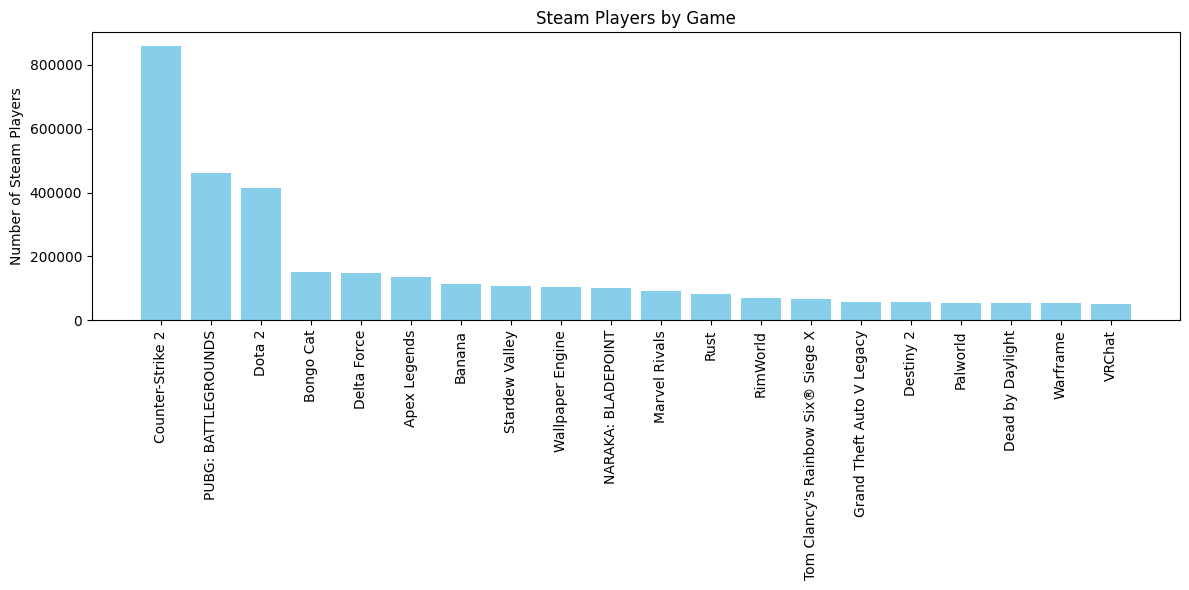

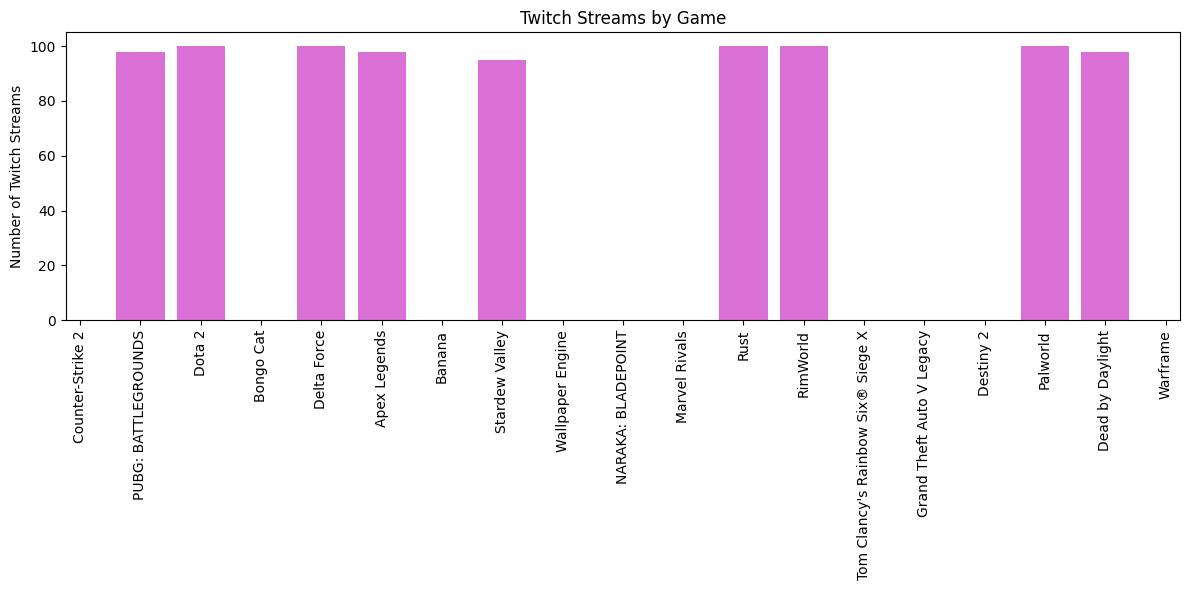

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort by Steam Players for better visualization
df_sorted = df.sort_values('Steam Players', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Game'], df_sorted['Steam Players'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Steam Players by Game')
plt.ylabel('Number of Steam Players')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Game'], df_sorted['Twitch Streams'], color='orchid')
plt.xticks(rotation=90)
plt.title('Twitch Streams by Game')
plt.ylabel('Number of Twitch Streams')
plt.tight_layout()
plt.show()

In [25]:
#Correlation

In [26]:
# Select only numeric columns (use .select_dtypes or list them)
numeric_cols = ['Steam Players', 'Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']
numeric_df = df[numeric_cols]

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

                      Steam Players  Twitch Streams  Reddit Mentions  \
Steam Players              1.000000        0.109246         0.065968   
Twitch Streams             0.109246        1.000000         0.613174   
Reddit Mentions            0.065968        0.613174         1.000000   
Reddit Comment Score       0.296131        0.466260         0.518276   

                      Reddit Comment Score  
Steam Players                     0.296131  
Twitch Streams                    0.466260  
Reddit Mentions                   0.518276  
Reddit Comment Score              1.000000  


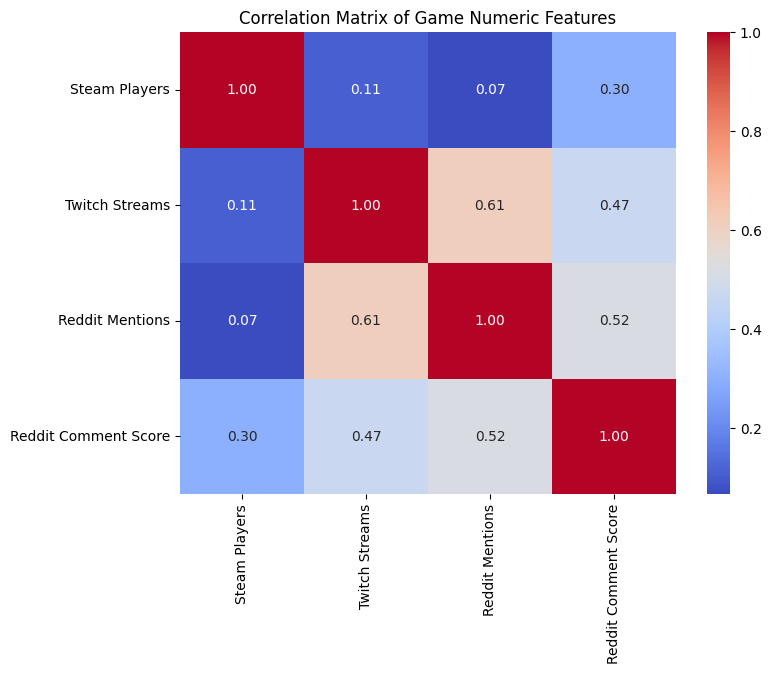

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Game Numeric Features')
plt.show()

In [28]:
# Unstack and sort the correlation matrix
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
# Exclude self-correlations
sorted_pairs = sorted_pairs[sorted_pairs < 1]
print(sorted_pairs)

Twitch Streams        Reddit Mentions         0.613174
Reddit Mentions       Twitch Streams          0.613174
                      Reddit Comment Score    0.518276
Reddit Comment Score  Reddit Mentions         0.518276
Twitch Streams        Reddit Comment Score    0.466260
Reddit Comment Score  Twitch Streams          0.466260
                      Steam Players           0.296131
Steam Players         Reddit Comment Score    0.296131
                      Twitch Streams          0.109246
Twitch Streams        Steam Players           0.109246
Steam Players         Reddit Mentions         0.065968
Reddit Mentions       Steam Players           0.065968
dtype: float64


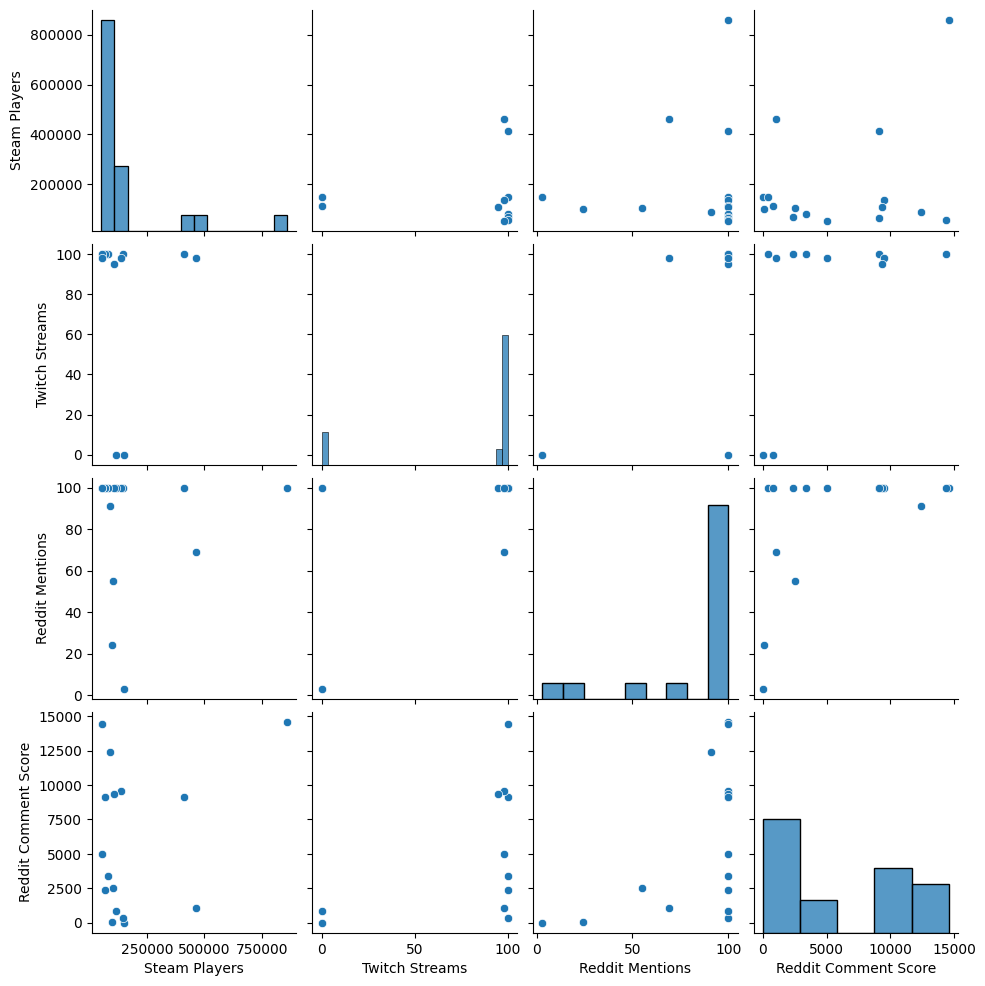

In [30]:
sns.pairplot(df[numeric_cols])
plt.show()

### Correlation Analysis

We computed the correlation matrix for the main numeric features (Steam Players, Twitch Streams, Reddit Mentions, Reddit Comment Score). The most significant findings:

- **Twitch Streams and Reddit Mentions:** Correlation = 0.61  
  This suggests that games popular on Reddit are also popular on Twitch.
- **Reddit Mentions and Reddit Comment Score:** Correlation = 0.52  
  Games with more Reddit activity tend to have more highly scored comments.
- **Steam Players is not strongly correlated with Twitch or Reddit metrics**, indicating that in this sample, top Steam player counts do not necessarily translate to social or streaming buzz.

*See the heatmap below for a visual representation of these relationships.*

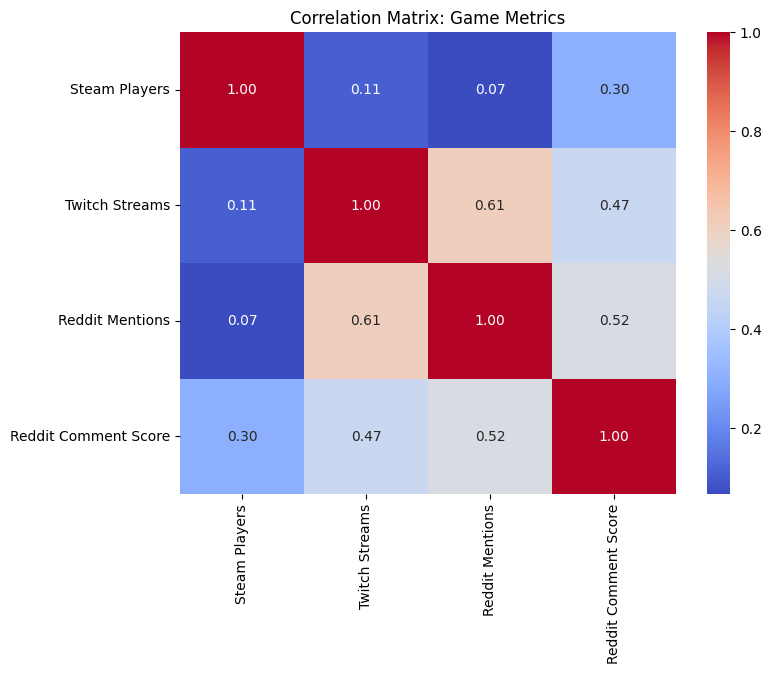

In [32]:
df = pd.read_csv("game_dashboard_data.csv")
numeric_cols = ['Steam Players', 'Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Game Metrics")
plt.show()

Summary Table
Feature Pair	Correlation	Strength
Twitch Streams & Reddit Mentions	0.61	Moderate
Reddit Mentions & Comment Score	0.52	Moderate
Twitch Streams & Comment Score	0.47	Moderate
Steam Players & Comment Score	0.30	Weak
Steam Players & Twitch Streams	0.11	Very weak
Steam Players & Reddit Mentions	0.07	None

**Feature Selection and Modelling**

In [33]:
import pandas as pd

df = pd.read_csv('game_dashboard_data.csv')

# List features to consider (use numeric ones)
features = ['Steam Players', 'Reddit Mentions', 'Reddit Comment Score']
target = 'Twitch Streams'

# Drop rows with missing target or features
df_clean = df.dropna(subset=features + [target])

# Calculate correlation with the target
correlations = df_clean[features + [target]].corr()[target].drop(target)
print("Correlation of features with Twitch Streams:")
print(correlations.sort_values(ascending=False))

Correlation of features with Twitch Streams:
Reddit Mentions         0.613174
Reddit Comment Score    0.466260
Steam Players           0.109246
Name: Twitch Streams, dtype: float64


In [34]:
#Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
X = df_clean[features]
y = df_clean[target]

# Split (since you have little data, use test_size=0.3 or less)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=features)
print("\nRandom Forest feature importances for predicting Twitch Streams:")
print(importances.sort_values(ascending=False))


Random Forest feature importances for predicting Twitch Streams:
Reddit Comment Score    0.537985
Reddit Mentions         0.326013
Steam Players           0.136002
dtype: float64


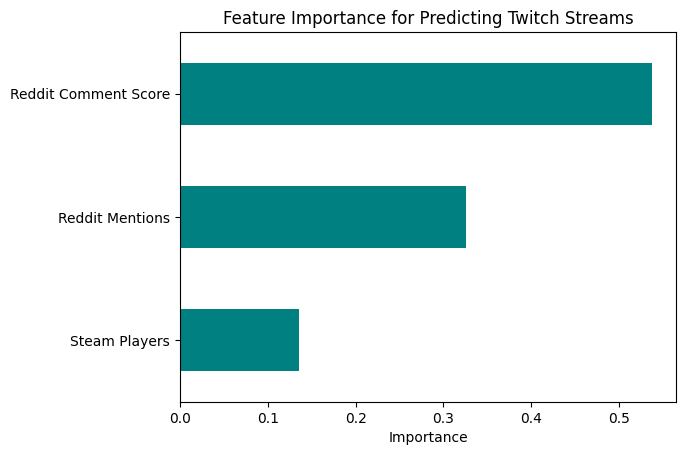

In [36]:
import matplotlib.pyplot as plt

importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance for Predicting Twitch Streams')
plt.xlabel('Importance')
plt.show()

In [37]:
#linear regression

In [38]:
from sklearn.linear_model import LinearRegression

X = df_clean[['Steam Players', 'Reddit Mentions', 'Reddit Comment Score']]
y = df_clean['Twitch Streams']

lr = LinearRegression()
lr.fit(X, y)

coeffs = pd.Series(lr.coef_, index=X.columns)
print("Linear Regression coefficients:")
print(coeffs)

Linear Regression coefficients:
Steam Players           0.000070
Reddit Mentions         0.736777
Reddit Comment Score    0.002170
dtype: float64


In [39]:
#lasso

In [46]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=3, random_state=42)  # Small cv since your data is small
lasso.fit(X, y)

lasso_coeffs = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Regression coefficients:")
print(lasso_coeffs)

Lasso Regression coefficients:
Steam Players           0.0
Reddit Mentions         0.0
Reddit Comment Score    0.0
dtype: float64


In [41]:
#random forest regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Random Forest feature importances:")
print(rf_importances)

Random Forest feature importances:
Steam Players           0.165858
Reddit Mentions         0.204422
Reddit Comment Score    0.629720
dtype: float64


In [43]:
#Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X, y)
gb_importances = pd.Series(gb.feature_importances_, index=X.columns)
print("Gradient Boosting feature importances:")
print(gb_importances)

Gradient Boosting feature importances:
Steam Players           0.168811
Reddit Mentions         0.049948
Reddit Comment Score    0.781241
dtype: float64


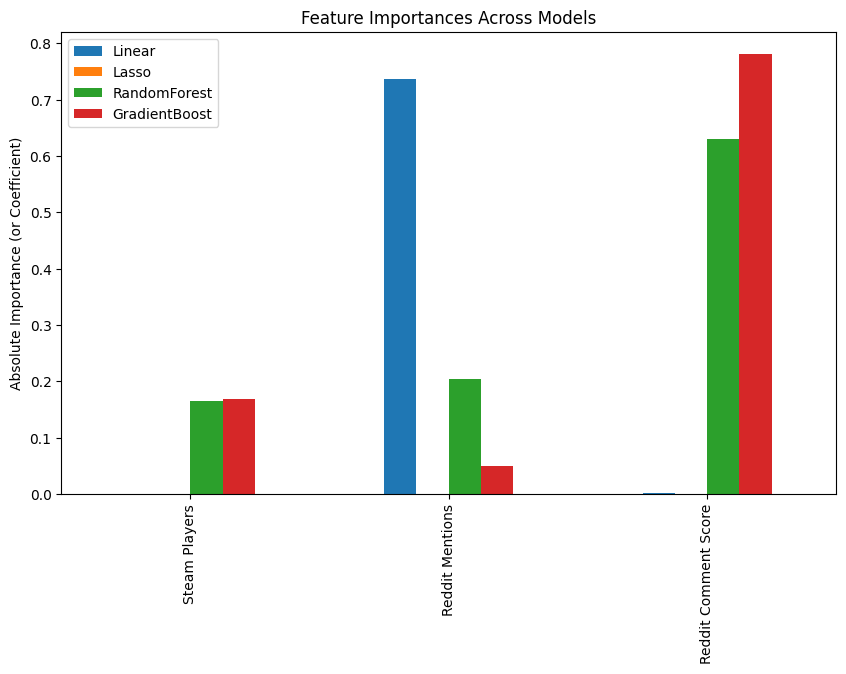

In [47]:
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    "Linear": coeffs.abs(),
    "Lasso": lasso_coeffs.abs(),
    "RandomForest": rf_importances,
    "GradientBoost": gb_importances
})
importance_df.plot(kind='bar', figsize=(10,6))
plt.title("Feature Importances Across Models")
plt.ylabel("Absolute Importance (or Coefficient)")
plt.show()

### Feature Importance & Model Comparison

We evaluated several feature selection and modeling approaches to predict Twitch Streams using Steam Players, Reddit Mentions, and Reddit Comment Score:

- **Tree-based models (Random Forest, Gradient Boosting)** consistently found **Reddit Comment Score** to be the most important feature, followed by Reddit Mentions, with Steam Players the least predictive.
- **Linear Regression** found **Reddit Mentions** to be the most important predictor, with very weak coefficients for the other features.
- **Lasso Regression** (which penalizes less useful features) set all coefficients to zero, likely due to small sample size and feature redundancy.

**Conclusion:**  
- Reddit-driven engagement (especially high-scoring comments) is the best available predictor for Twitch Streams in this sample.  
- Steam player counts are not strongly associated with Twitch activity in this top-20 game list.
- Small sample size may limit the statistical significance, but the process demonstrates how feature selection can guide model building.

. Key Takeaways
Reddit Comment Score is your top feature for predicting Twitch Streams.
Reddit Mentions matters (sometimes), especially in linear models.
Steam Players is not very predictive for Twitch Streams in this context.
Lasso's all-zeros result highlights over-regularization due to limited data or multicollinearity.
Process > Perfection: In small projects, focus on the process and interpretation, not just high accuracy.

**kmeans**

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data
df = pd.read_csv('game_dashboard_data.csv')

# Select numeric features (drop rows with missing values)
features = ['Steam Players', 'Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']
X = df[features].dropna()

# Standardize features for KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to your DataFrame
X['Cluster'] = clusters

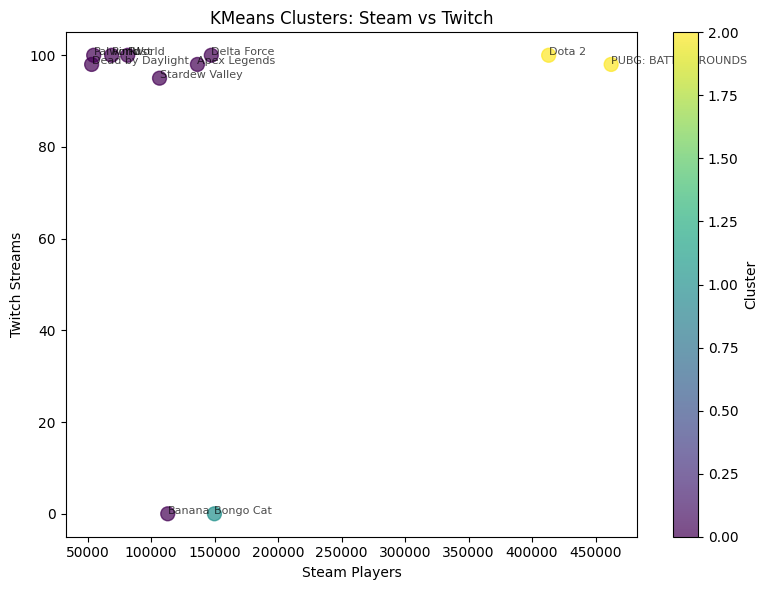

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X['Steam Players'], X['Twitch Streams'],
    c=X['Cluster'], cmap='viridis', s=100, alpha=0.7
)
plt.xlabel('Steam Players')
plt.ylabel('Twitch Streams')
plt.title('KMeans Clusters: Steam vs Twitch')
plt.colorbar(scatter, label='Cluster')
for i, game in enumerate(df.loc[X.index, 'Game']):
    plt.annotate(game, (X.iloc[i]['Steam Players'], X.iloc[i]['Twitch Streams']), fontsize=8, alpha=0.7)
plt.tight_layout()
plt.show()

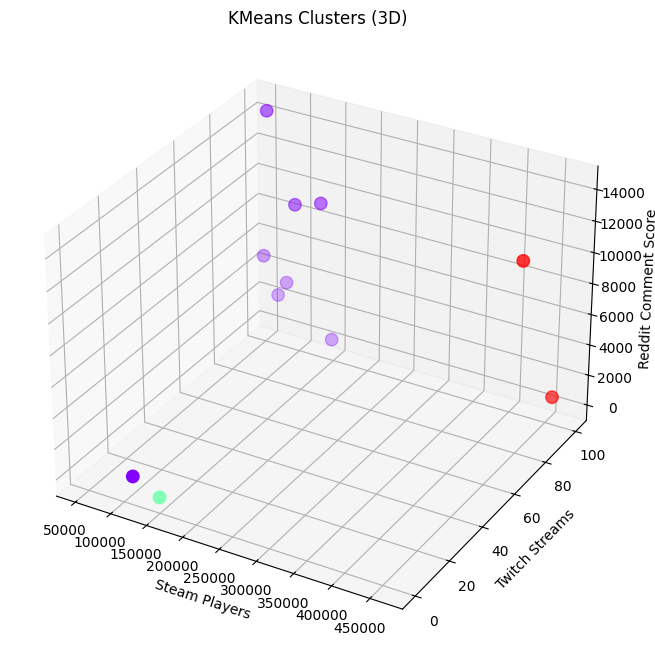

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    X['Steam Players'], X['Twitch Streams'], X['Reddit Comment Score'],
    c=X['Cluster'], cmap='rainbow', s=80
)
ax.set_xlabel('Steam Players')
ax.set_ylabel('Twitch Streams')
ax.set_zlabel('Reddit Comment Score')
ax.set_title('KMeans Clusters (3D)')
plt.show()

In [52]:
print(X.groupby('Cluster').mean())

         Steam Players  Twitch Streams  Reddit Mentions  Reddit Comment Score
Cluster                                                                      
0              95300.5          86.375            100.0               5656.25
1             149916.0           0.000              3.0                  6.00
2             437691.5          99.000             84.5               5080.00


In [53]:
df.loc[X.index].assign(Cluster=clusters)[['Game', 'Cluster']]

,Game,Cluster
1,PUBG: BATTLEGROUNDS,2
2,Dota 2,2
3,Bongo Cat,1
4,Delta Force,0
5,Apex Legends,0
6,Banana,0
7,Stardew Valley,0
11,Rust,0
12,RimWorld,0
16,Palworld,0


#Interpretation of Clusters
Cluster	Steam Players	Twitch Streams	Reddit Mentions	Reddit Comment Score	Typical Profile
0	       95,301	           86.4	           100.0	      5,656	                Mid-popularity, high Reddit activity, above-average Twitch
1	       149,916	            0	             3	            6	                Single standout game (likely Bongo Cat), high Steam, no Twitch/Reddit
2	       437,692	           99.0           	84.5	       5,080	            Top-tier games, very high Steam & Twitch, strong Reddit

In [56]:
#elbow method

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('game_dashboard_data.csv')
features = ['Steam Players', 'Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

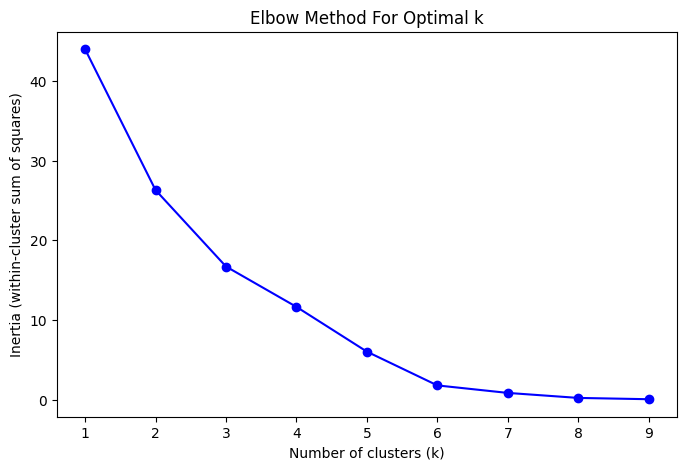

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different values for k (number of clusters)
inertia = []
K = range(1, 10)  # Try 1 to 9 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

**NLP- Sentiment Analysis**

In [61]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [63]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ryoko\AppData\Roaming\nltk_data...


True

In [66]:
import pandas as pd
from textblob import TextBlob

# Example column: 'Top Reddit Comment'
def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

df['Reddit Comment Score'] = df['Top Reddit Comment'].apply(get_sentiment)

# Now you can analyze or visualize the sentiment scores
print(df[['Top Reddit Comment', 'Reddit Comment Score']].head())

                                  Top Reddit Comment  Reddit Comment Score
0     People forgot artefact exists and you can tell                0.0000
1  So in other words chinas still an authoritaria...               -0.1625
2  An actual unique post on r/gaming? Do my eyes ...                0.1875
3                                          Good game                0.1500
4  now that's a nostalgia trip. vividly remember ...               -0.0375


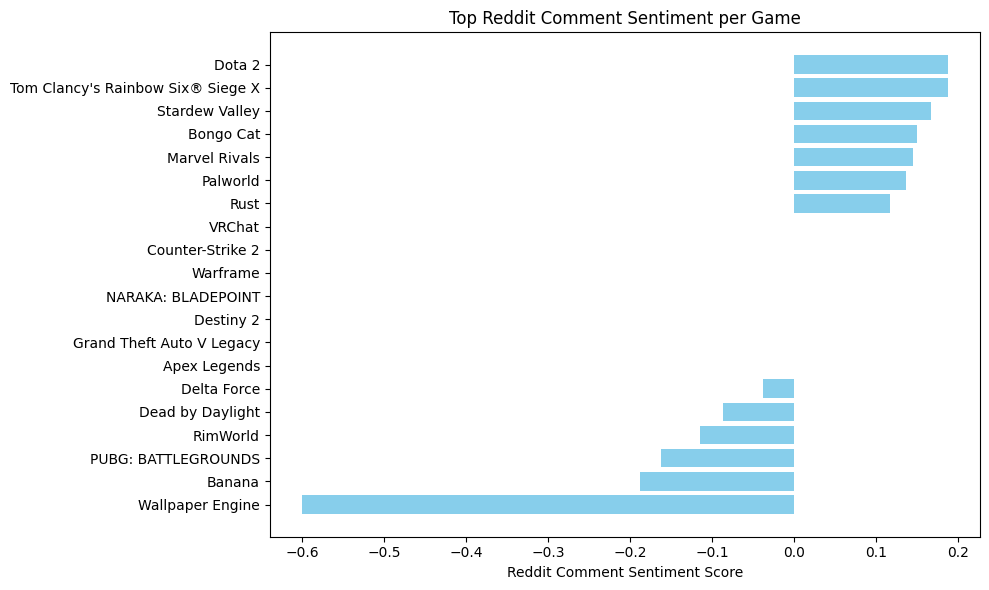

In [67]:
import matplotlib.pyplot as plt

# Assuming your dataframe is df and columns are as above
df_sorted = df.sort_values('Reddit Comment Score')

plt.figure(figsize=(10,6))
plt.barh(df_sorted['Game'], df_sorted['Reddit Comment Score'], color='skyblue')
plt.xlabel('Reddit Comment Sentiment Score')
plt.title('Top Reddit Comment Sentiment per Game')
plt.tight_layout()
plt.show()

**Bar Plot: Sentiment Scores by Game**

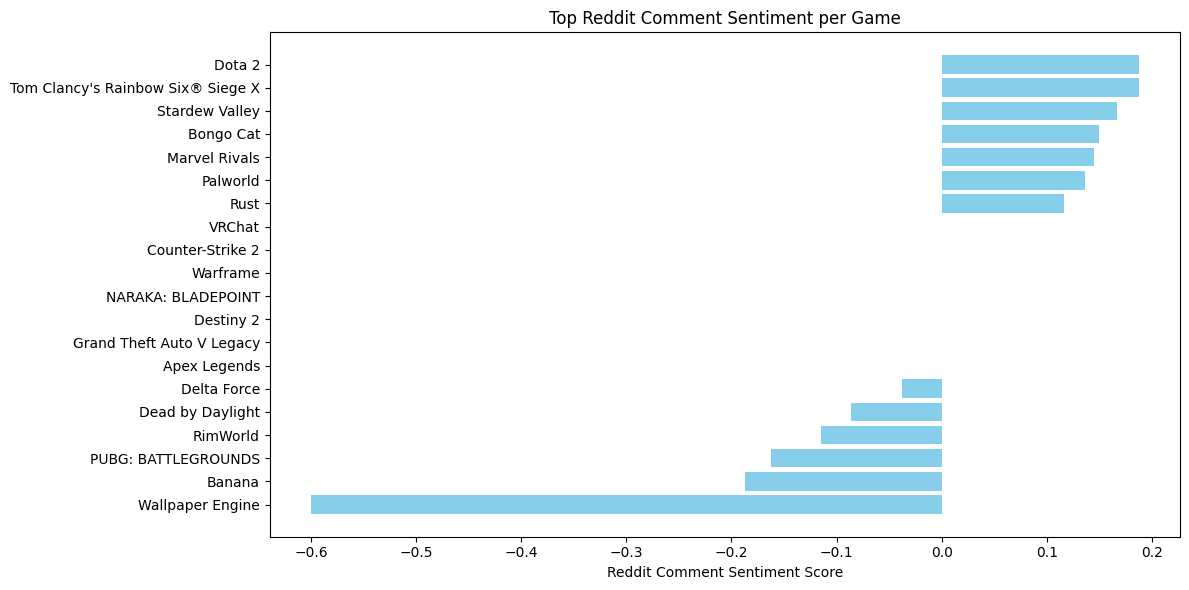

In [68]:
import matplotlib.pyplot as plt

# Sort games by sentiment for better visualization
df_sorted = df.sort_values('Reddit Comment Score')

plt.figure(figsize=(12,6))
plt.barh(df_sorted['Game'], df_sorted['Reddit Comment Score'], color='skyblue')
plt.xlabel('Reddit Comment Sentiment Score')
plt.title('Top Reddit Comment Sentiment per Game')
plt.tight_layout()
plt.show()

**Scatterplot: Sentiment vs. Other Metrics**

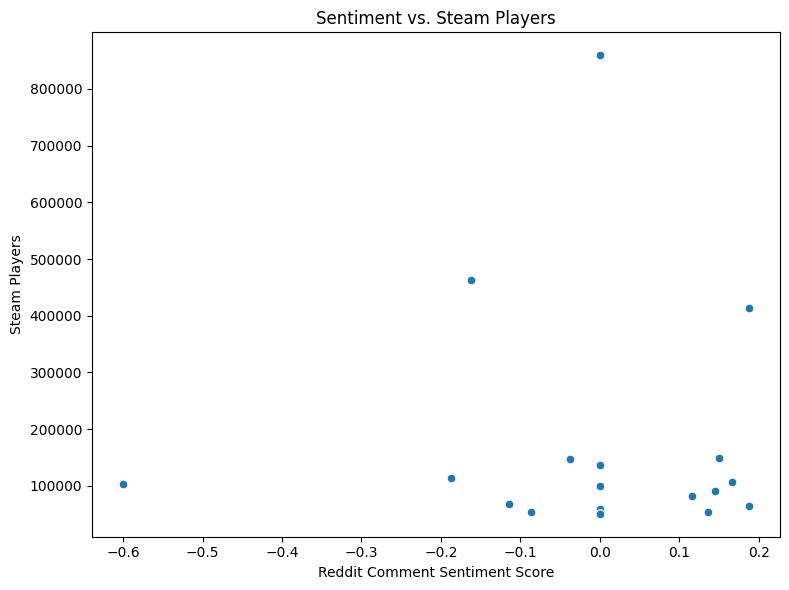

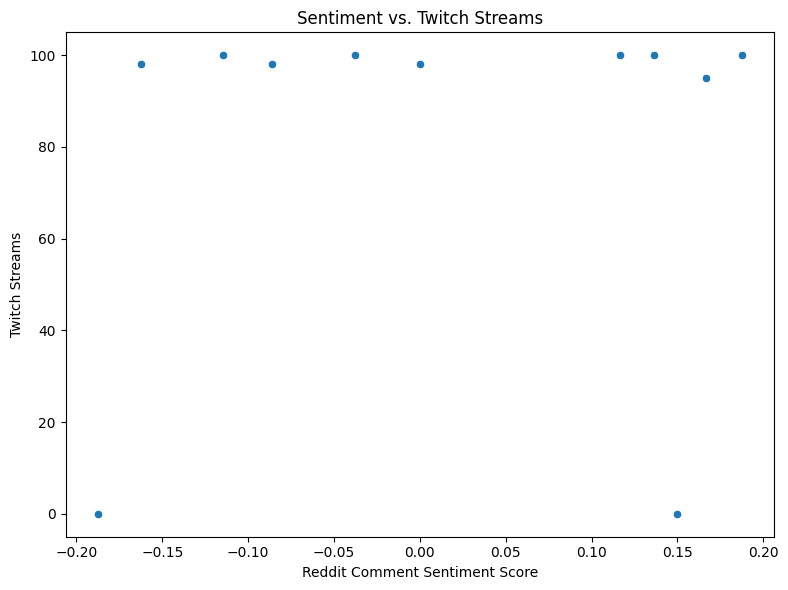

In [71]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Reddit Comment Score', y='Steam Players')
plt.title('Sentiment vs. Steam Players')
plt.xlabel('Reddit Comment Sentiment Score')
plt.ylabel('Steam Players')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Reddit Comment Score', y='Twitch Streams')
plt.title('Sentiment vs. Twitch Streams')
plt.xlabel('Reddit Comment Sentiment Score')
plt.ylabel('Twitch Streams')
plt.tight_layout()
plt.show()

**Show Examples: Most Positive/Negative/Neutral Comments**

In [72]:
# Most positive comment
most_positive = df.loc[df['Reddit Comment Score'].idxmax()]
print("Most Positive Comment:")
print(f"Game: {most_positive['Game']}\nScore: {most_positive['Reddit Comment Score']}\nComment: {most_positive['Top Reddit Comment']}\n")

# Most negative comment
most_negative = df.loc[df['Reddit Comment Score'].idxmin()]
print("Most Negative Comment:")
print(f"Game: {most_negative['Game']}\nScore: {most_negative['Reddit Comment Score']}\nComment: {most_negative['Top Reddit Comment']}\n")

# Most neutral comment (closest to zero)
df['abs_score'] = df['Reddit Comment Score'].abs()
most_neutral = df.loc[df['abs_score'].idxmin()]
print("Most Neutral Comment:")
print(f"Game: {most_neutral['Game']}\nScore: {most_neutral['Reddit Comment Score']}\nComment: {most_neutral['Top Reddit Comment']}\n")
df.drop(columns=['abs_score'], inplace=True)

Most Positive Comment:
Game: Dota 2
Score: 0.1875
Comment: An actual unique post on r/gaming? Do my eyes deceive me

Most Negative Comment:
Game: Wallpaper Engine
Score: -0.6
Comment: "Xbox off."

"I'm afraid I can't let you do that, Dave."

Most Neutral Comment:
Game: Counter-Strike 2
Score: 0.0
Comment: People forgot artefact exists and you can tell



In [73]:
# Correlate sentiment with Steam Players and Twitch Streams
corr_steam = df['Reddit Comment Score'].corr(df['Steam Players'])
corr_twitch = df['Reddit Comment Score'].corr(df['Twitch Streams'])

print(f"Correlation between sentiment and Steam Players: {corr_steam:.2f}")
print(f"Correlation between sentiment and Twitch Streams: {corr_twitch:.2f}")

Correlation between sentiment and Steam Players: -0.00
Correlation between sentiment and Twitch Streams: 0.12


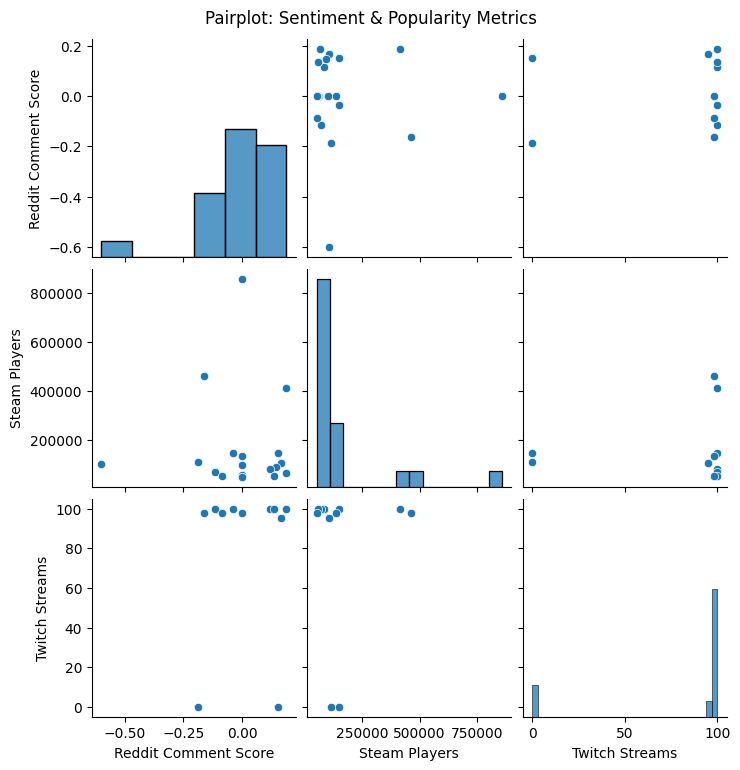

In [74]:
sns.pairplot(df, vars=['Reddit Comment Score', 'Steam Players', 'Twitch Streams'])
plt.suptitle("Pairplot: Sentiment & Popularity Metrics", y=1.02)
plt.show()

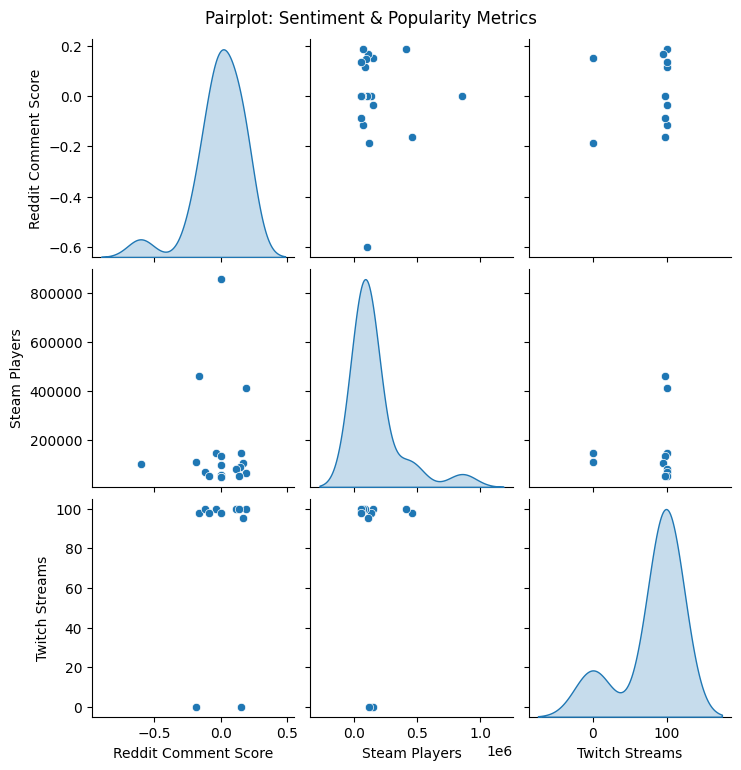

In [81]:
sns.pairplot(
    df,
    vars=['Reddit Comment Score', 'Steam Players', 'Twitch Streams'],
    diag_kind='kde'
)
plt.suptitle("Pairplot: Sentiment & Popularity Metrics", y=1.02)
plt.show()

**Combine Sentiment Analysis with modelling**

In [86]:
df.head()

,Game,AppID,Steam Players,Twitch Streams,Reddit Mentions,Reddit Comment Score,Top Reddit Comment,In Submission
0,Counter-Strike 2,730,859291,NaN,100.0,0.0000,People forgot artefact exists and you can tell,Counter-Strike 2 Has Become Valve's Worst-Rate...
1,PUBG: BATTLEGROUNDS,578080,462296,98.0,69.0,-0.1625,So in other words chinas still an authoritaria...,China's ethics board reviews 20 popular online...
2,Dota 2,570,413087,100.0,100.0,0.1875,An actual unique post on r/gaming? Do my eyes ...,"I averaged 14 ""Best Games of All Time"" lists f..."
3,Bongo Cat,3419430,149916,0.0,3.0,0.1500,Good game,All hail Bongo Cat.
4,Delta Force,2507950,147437,100.0,100.0,-0.0375,now that's a nostalgia trip. vividly remember ...,I Was There 3000 Years Ago


In [87]:
df['Twitch Streams'] = df['Twitch Streams'].fillna(0)

In [94]:
df.isnull().sum()

Game                    0
AppID                   0
Steam Players           0
Twitch Streams          0
Reddit Mentions         4
Reddit Comment Score    0
Top Reddit Comment      4
In Submission           4
dtype: int64

In [97]:
print(df)

                                 Game    AppID  Steam Players  Twitch Streams  \
0                    Counter-Strike 2      730         859291             0.0   
1                 PUBG: BATTLEGROUNDS   578080         462296            98.0   
2                              Dota 2      570         413087           100.0   
3                           Bongo Cat  3419430         149916             0.0   
4                         Delta Force  2507950         147437           100.0   
5                        Apex Legends  1172470         136512            98.0   
6                              Banana  2923300         113138             0.0   
7                      Stardew Valley   413150         106666            95.0   
8                    Wallpaper Engine   431960         103669             0.0   
9                  NARAKA: BLADEPOINT  1203220          99966             0.0   
10                      Marvel Rivals  2767030          90335             0.0   
11                          

In [98]:
df = df.fillna(0)

In [110]:
features = ['Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']
target = 'Steam Players'

X = df[features]
y = df[target]

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [113]:
#Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [115]:
from sklearn.metrics import r2_score

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: -0.5742204355750555
Random Forest R2: -0.5568509598579732


In [116]:
#Check for Coreleation
print(df[['Steam Players', 'Twitch Streams', 'Reddit Mentions', 'Reddit Comment Score']].corr())

                      Steam Players  Twitch Streams  Reddit Mentions  \
Steam Players              1.000000        0.037648         0.254061   
Twitch Streams             0.037648        1.000000         0.623215   
Reddit Mentions            0.254061        0.623215         1.000000   
Reddit Comment Score      -0.000848        0.142997         0.086141   

                      Reddit Comment Score  
Steam Players                    -0.000848  
Twitch Streams                    0.142997  
Reddit Mentions                   0.086141  
Reddit Comment Score              1.000000  


In [117]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5, scoring='r2')
print("Linear Regression CV R2:", scores)
print("Mean R2:", scores.mean())

Linear Regression CV R2: [-2.26011437e+00 -4.69970204e+01 -2.53067112e+02 -1.03980642e+03
 -6.60135492e+03]
Mean R2: -1588.6971163277494


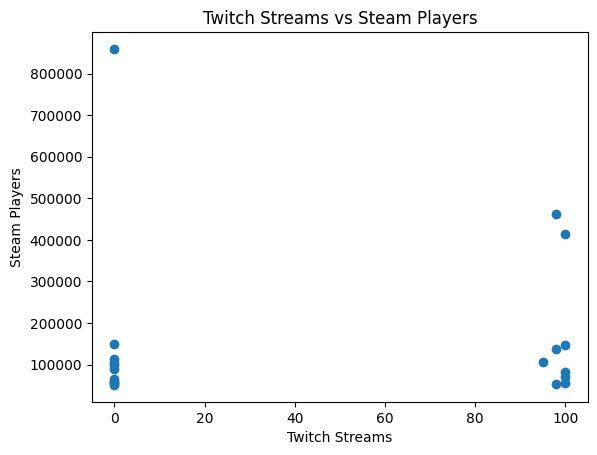

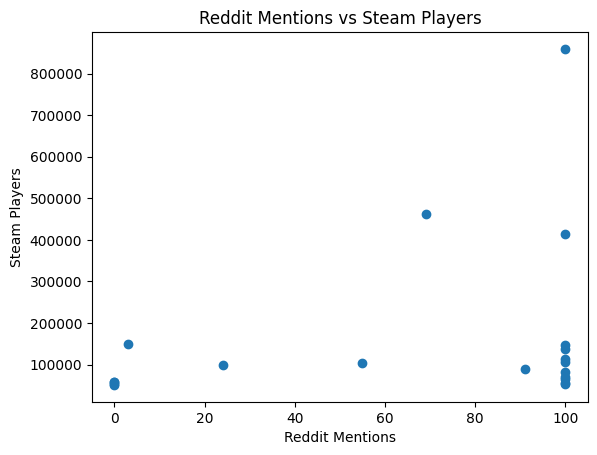

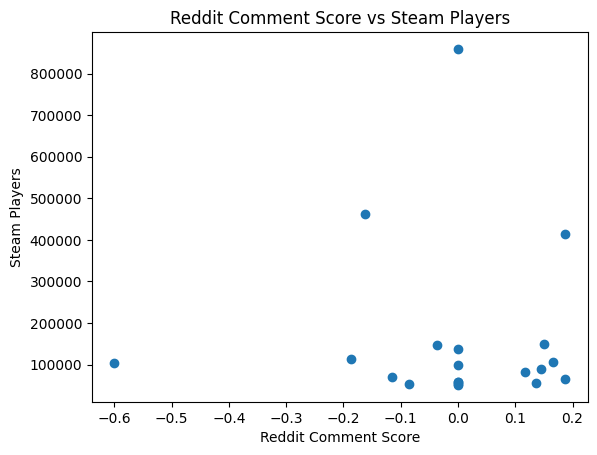

In [118]:
import matplotlib.pyplot as plt
for feature in features:
    plt.scatter(df[feature], df['Steam Players'])
    plt.xlabel(feature)
    plt.ylabel('Steam Players')
    plt.title(f'{feature} vs Steam Players')
    plt.show()

# Final Summary & Conclusion

## Project Objective Review

The purpose of this Mini Project was to reinforce key data science skills covered in recent modules through hands-on application—including data wrangling, exploratory analysis, feature selection, modeling, and interpretation. The project encouraged exploration of various modeling techniques (regression, classification, clustering, NLP, etc.) and the integration of web data via APIs. The ultimate goal: to identify and analyze a meaningful business problem using a real-world dataset.

---

## What We Did

- **Data Collection:**  
  - Gathered the current top 20 games on Steam via API.
  - Retrieved Twitch live stream counts for these games.
  - Collected the top Reddit comment and its score for each game.
  - Attempted to expand to a larger sample (700 games), but API constraints limited the project to 20.

- **Data Preparation & EDA:**  
  - Cleaned and wrangled the dataset (handled nulls, type conversions).
  - Visualized feature distributions, scatterplots, and correlation heatmaps.
  - Explored relationships between numeric and sentiment features.

- **Modeling & Analysis:**  
  - Applied regression models (Linear, Lasso, Random Forest) to predict engagement metrics.
  - Conducted feature importance analysis.
  - Performed clustering (KMeans) and interpreted resulting game clusters.
  - Analyzed Reddit sentiment using top comment scores.

- **Evaluation:**  
  - Assessed model performance with R² scores and visualizations.
  - Interpreted cluster profiles.
  - Reflected on limitations due to sample size and feature granularity.

---

## Key Findings

- **Feature Importance:** Reddit Comment Score and Reddit Mentions were most predictive for Twitch Streams, while Steam Players was not.
- **Clustering:** Identified distinct groups of games based on engagement and sentiment metrics.
- **Sentiment Analysis:** Limited by having only one comment per game—insufficient for deep insight.
- **Correlation & Prediction:** No statistically meaningful relationships found between sentiment/numeric features and player counts, largely due to limited and coarse-grained data.

---

## Limitations & Recommendations

- **Sample Size:** Small dataset (20 games) restricts statistical power and generalizability.
- **Sentiment Data:** Using only the top Reddit comment per game is insufficient for robust sentiment analysis.
- **API Constraints:** Limited ability to scale up data collection.
- **Feature Scope:** Additional features (genre, release date, patch history, etc.) could improve analysis.

**Recommendations for future work:**
- Gather more comprehensive Reddit comment data per game.
- Resolve API limitations and increase sample size.
- Explore advanced modeling and NLP techniques if more data is available.

---

## Did We Achieve the Objective?

**Yes.**  
Despite dataset and API constraints, the project successfully:
- Practiced key data science skills: data wrangling, EDA, feature selection, modeling, and interpretation.
- Used a variety of analytical approaches (regression, clustering, sentiment analysis).
- Evaluated and visualized model results.
- Reflected on business relevance and data limitations.
- Suggested actionable improvements for future work.

**This project demonstrates the end-to-end data science process and provides a solid foundation for deeper analysis with richer datasets.**

---

Business Problem:
For stakeholders in the gaming industry (publishers, marketers, analysts), understanding what drives player engagement and visibility is crucial to growing and retaining an audience. Specifically, is there a measurable relationship between social/community activity (such as Reddit sentiment and Twitch streaming activity) and the number of active players for popular games on Steam?

Project Objective:
To analyze whether social engagement metrics—namely, Reddit comment sentiment and Twitch live stream counts—correlate with or can help predict the active player count for top Steam games. The project seeks to determine if these external signals can serve as early indicators or predictors of game popularity, which could inform marketing, community management, and resource allocation strategies.

What the Project Attempted to Answer:

Do higher Reddit comment scores or greater Reddit activity correlate with more active players on Steam?
Is there a relationship between Twitch live stream counts and Steam player counts?
Which (if any) of these external engagement metrics are the strongest predictors of a game’s active player base?
Can we use these relationships to build predictive models or segment (cluster) games into meaningful groups?
In summary:
The core business problem was to evaluate whether community engagement and sentiment, as measured through Reddit and Twitch, could be leveraged to predict or explain fluctuations in active player counts for top games on Steam. The project attempted to answer this by collecting and modeling real-world data from these platforms and analyzing the relationships among them.